In [1]:
import numpy as np #Libray for creating it'a main object, Arrays + different functions for it
import pandas as pd #Library to transform data, manipulate data
import matplotlib.pyplot as plt #Library for visualizing data
from matplotlib.colors import ListedColormap

In [2]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [3]:
# read Iris data set

#Take the CSV and transform it into a Dataframe --> A table. 
#df = data file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv.xlsx', header = None)
df.tail()

print(df)

#''' Store the data into integer indexed array : all rows : all columns . IA = Indexed Array  '''
IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])


#''' Store only the last column, The iris type. CL == Column Last '''
Cl = IA[:,4] 
print(Cl)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
5    5.4  3.9  1.7  0.4     Iris-setosa
6    4.6  3.4  1.4  0.3     Iris-setosa
7    5.0  3.4  1.5  0.2     Iris-setosa
8    4.4  2.9  1.4  0.2     Iris-setosa
9    4.9  3.1  1.5  0.1     Iris-setosa
10   5.4  3.7  1.5  0.2     Iris-setosa
11   4.8  3.4  1.6  0.2     Iris-setosa
12   4.8  3.0  1.4  0.1     Iris-setosa
13   4.3  3.0  1.1  0.1     Iris-setosa
14   5.8  4.0  1.2  0.2     Iris-setosa
15   5.7  4.4  1.5  0.4     Iris-setosa
16   5.4  3.9  1.3  0.4     Iris-setosa
17   5.1  3.5  1.4  0.3     Iris-setosa
18   5.7  3.8  1.7  0.3     Iris-setosa
19   5.1  3.8  1.5  0.3     Iris-setosa
20   5.4  3.4  1.7  0.2     Iris-setosa
21   5.1  3.7  1.5  0.4     Iris-setosa
22   4.6  3.6  1.0  0.2     Iris-setosa
23   5.1  3.3  1.7  0.5     Iris-setosa


In [4]:
# get Iris classifications

#Find the unique values. Ie, the three types of Iris. IC = Iris Column
IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
pltC = ('red', 'blue', 'green') #Array of Plot Colors
pltM = ('o', 'x', '*') #Array of Plot symbol

#Associate a classification with a color and a symbol
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
          

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [6]:
# setup Iris feature lablels

#Iris F = Iris Features
IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


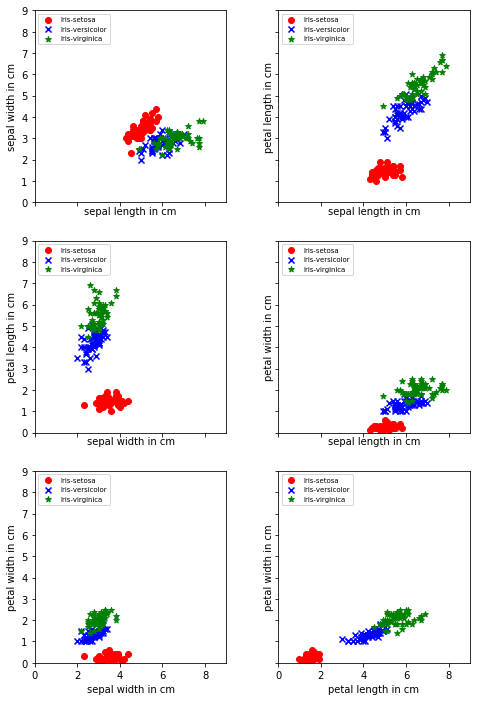

In [7]:
# plot classifications of all pairs of features 

#Pick the first feature as y. Then go through the previous one's and make them x feautres! (This is how it works)
#So, pick sepal len, nothing before (i = 0, j = 0)
#Pick sepal width (i = 1) only sepal len was before (j=0) so make one chart with the comparisons of this combination 



plt.close('all') #close all figures if any are open

#Create a figure and the associated subplots. 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True) #Create multiple plots


i = 0 #Number of rows or number of features to go through
#y axis feature is dependant on i. 

#k, k1, k2 Declare which chart we are referencing. 
k = 0 #This doesn't reset. 

#These two depend on k's value. 
k1 = 0
k2 = 0

while i < 4:
    yF = IrisF[i] #Pull each feature As y. yF = y axis Feature ?
    
    j = 0 #inner loop variable --> What X feature of data we will pull
    
    while j < i: #Starts when I = 1 (When we make 1 chart.)
       
        #Declare which chart we are referencing. 
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        
        
        xF = IrisF[j] #Pull each feature as x. xF = x axis Feature.
        
        #Create a scatter plot. ax = axis. -- NOTE, this is global and what we plot.
        #Add in each data set. Notice because they all have a unique id, the data won't be mixed into each color type!
        
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
                          marker=pltM[0], label=IC[0])
        #IC = 0. Pull in only the Iris-Setosa Data. 
        #x  = IA[Cl == IC[0], j] ==> Get all of the rows which are Iris Setosa (The condition) and then pull all the j columns
        
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        #IC = 1. Pull in only the Iris-versicolor Data.
        
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], 
                          marker=pltM[2], label=IC[2])
        #IC = 2. Pull in only the Iris-virginica Data.
        
        
        #Configure properities of the chart. 
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1 #keep going through all the previous x values. 
        k += 1 #Keep shifting to a new chart. 
    i += 1
plt.show()    

In [8]:
# focus on classification of "versicolor" and "virginica", class indexes 1 and 2;  
# Note these classes are not linearly separable


# set to 1 and -1 in class array
cdx = np.array([1,2])   


# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx_sepal_length_and_petal_length = np.array([0,2])

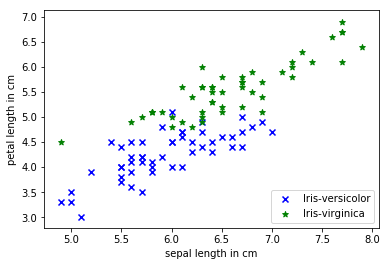

In [9]:
i = 0
numCl = 0 #count all of the data points which are versicolor or virginica 

for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1 
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
#Array(Row) filled with zeros for all clasifications 
NC = np.zeros((numCl))

#Array(Column -- 2) filled with zeros for the two features. 
NFeatures_sepal_length_and_petal_length = np.zeros((numCl, 2))


# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the two features that we want. Store calssiciatins in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        
        NC[j] = 1 #Set classification value to 1
        
        #Pull in associated feature values.
        NFeatures_sepal_length_and_petal_length[j,0] = IA[i,fdx_sepal_length_and_petal_length[0]] 
        NFeatures_sepal_length_and_petal_length[j,1] = IA[i,fdx_sepal_length_and_petal_length[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NC[j] = -1 #Set classification value to -1
        NFeatures_sepal_length_and_petal_length[j,0] = IA[i,fdx_sepal_length_and_petal_length[0]]
        NFeatures_sepal_length_and_petal_length[j,1] = IA[i,fdx_sepal_length_and_petal_length[1]]
        j += 1
    i += 1

plt.close('all') #Clear all plots. 

#Create a single scatter plot of the data --- Not looking at Adaline Model Yet. 

#First add in the versicolor data values. 
plt.scatter(x = NFeatures_sepal_length_and_petal_length[NC == 1, 0], y = NFeatures_sepal_length_and_petal_length[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])

#Second add in the virginica data values. 
plt.scatter(x = NFeatures_sepal_length_and_petal_length[NC == -1, 0], y = NFeatures_sepal_length_and_petal_length[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx_sepal_length_and_petal_length[0]])
plt.ylabel(IrisF[fdx_sepal_length_and_petal_length[1]])
plt.legend(loc='lower right')
plt.show() 

#Now we have a clean plot between Iris-versicolor and Iris-virginica, showing only the sepal vs petal length 

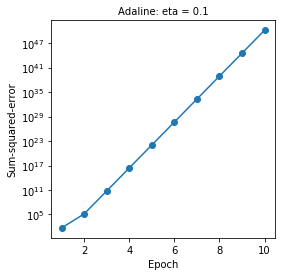

In [10]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

#Create an Adeline Model. Go through the features + classifications. And return the model.
#Set the n or eta or learning value to 0.1 
#Set epoch or number of times to go through training data as 10. -- Should come out with 10 different values.
ada = AdalineGD(n_iter=10, eta=0.1).fit(NFeatures_sepal_length_and_petal_length, NC)
#This model will go through the features and try to compose it as one of the classifications.
#It will give us back the cost of each iteration (ie how off it was from y-output)
#And it will give us the weight coefficients for each sample/feature. 


# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

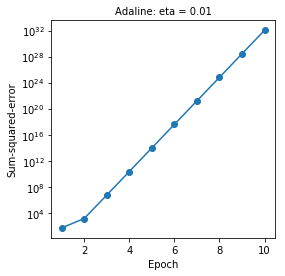

In [11]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Same as above, but this time lets see if the cost decreases ith a 10 time smaller learning rate. 
ada = AdalineGD(n_iter=10, eta=0.01).fit(NFeatures_sepal_length_and_petal_length, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show() #we do indeed see a decrease by ~ Half.  ----> Note that the more iterations there are, the greater the cost

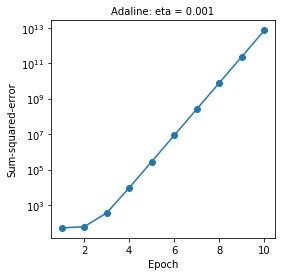

In [12]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Repeat again above but with an even smaller learning rate.
ada = AdalineGD(n_iter=10, eta=0.001).fit(NFeatures_sepal_length_and_petal_length, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show() #Again, tremendous decrease in cost. (Roughly same number of iterations) ----> Note that the more iterations there are, the greater the cost

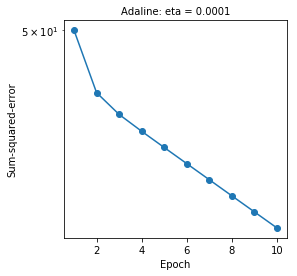

In [13]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Decrease learning rate once more.
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NFeatures_sepal_length_and_petal_length, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show() #Negative slope == more iterations == smaller cost. However note that the change per iteration is very small. We would need thousands of iterations just to continue decreasing the cost. 

In [14]:
# Standardize Inputs 

#NOTE --- I havent read up on Standardization. But basically what we see is that we ca have both more iterations + a smaller learning rate, and view a negative slope trend (what we want)
#The number of iterations is only 5* more. (Not that big of a number but still big enough.)

NFeatures_sepal_length_and_petal_length_Std = np.copy(NFeatures_sepal_length_and_petal_length)
NFeatures_sepal_length_and_petal_length_Std[:,0] = (NFeatures_sepal_length_and_petal_length[:,0] - NFeatures_sepal_length_and_petal_length[:,0].mean()) / NFeatures_sepal_length_and_petal_length[:,0].std()
NFeatures_sepal_length_and_petal_length_Std[:,1] = (NFeatures_sepal_length_and_petal_length[:,1] - NFeatures_sepal_length_and_petal_length[:,1].mean()) / NFeatures_sepal_length_and_petal_length[:,1].std()

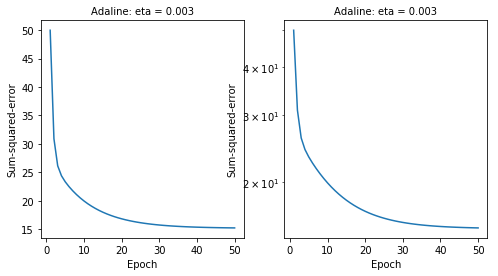

In [15]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NFeatures_sepal_length_and_petal_length_Std, NC) #Use the standardize Features_sepal_length_and_petal_lengtharray. 
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

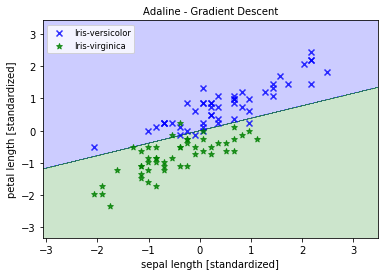

In [16]:
from matplotlib.colors import ListedColormap

#This is a plot which shows current data, and the line that we get from the Adaline Model (The decision boundry.)
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NFeatures_sepal_length_and_petal_length_Std, NC, classifier = ada) #Notice, we are using the standardized data. 
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [17]:
accuracy_sepal_length_and_petal_length_Std = ada.accuracy(NFeatures_sepal_length_and_petal_length_Std, NC)

print(accuracy_sepal_length_and_petal_length_Std)

0.94


In [18]:
# focus on the features "sepal length" and "petal width", feature indexes 0 and 3
fdx_sepal_length_and_petal_width = np.array([0,3])


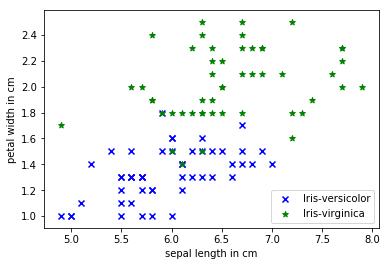

In [19]:
#Array(Column -- 2) filled with zeros for the two features. 
NFeatures_sepal_length_and_petal_width = np.zeros((numCl, 2))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the two features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_length_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_petal_width[0]] 
        NFeatures_sepal_length_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_petal_width[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_length_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_petal_width[0]]
        NFeatures_sepal_length_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_petal_width[1]]
        j += 1
    i += 1

plt.close('all') #Clear all plots. 

#Create a single scatter plot of the data --- Not looking at Adaline Model Yet. 

#First add in the versicolor data values. 
plt.scatter(x = NFeatures_sepal_length_and_petal_width[NC == 1, 0], y = NFeatures_sepal_length_and_petal_width[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])

#Second add in the virginica data values. 
plt.scatter(x = NFeatures_sepal_length_and_petal_width[NC == -1, 0], y = NFeatures_sepal_length_and_petal_width[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx_sepal_length_and_petal_width[0]])
plt.ylabel(IrisF[fdx_sepal_length_and_petal_width[1]])
plt.legend(loc='lower right')
plt.show() #Now we have a clean plot between Iris-versicolor and Iris-virginica, showing only the sepal length vs petal width 

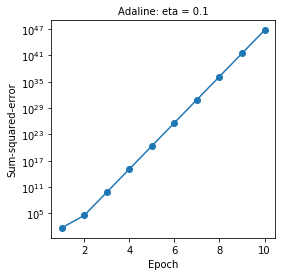

In [20]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

#Create an Adeline Model. Go through the features + classifications. And return the model.
#Set the n or eta or learning value to 0.1 
#Set epoch or number of times to go through training data as 10. -- Should come out with 10 different values.
ada = AdalineGD(n_iter=10, eta=0.1).fit(NFeatures_sepal_length_and_petal_width, NC)
#This model will go through the features and try to compose it as one of the classifications.
#It will give us back the cost of each iteration (ie how off it was from y-output)
#And it will give us the weight coefficients for each sample/feature. 


# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

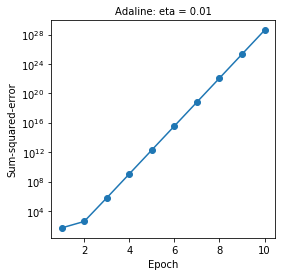

In [21]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Same as above, but this time lets see if the cost decreases ith a 10 time smaller learning rate. 
ada = AdalineGD(n_iter=10, eta=0.01).fit(NFeatures_sepal_length_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show() #we do indeed see a decrease by ~ Half.  ----> Note that the more iterations there are, the greater the cost

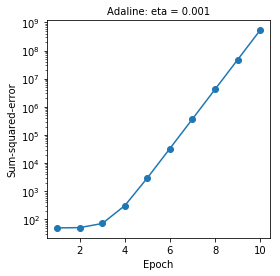

In [22]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Repeat again above but with an even smaller learning rate.
ada = AdalineGD(n_iter=10, eta=0.001).fit(NFeatures_sepal_length_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show() #Again, tremendous decrease in cost. (Roughly same number of iterations) ----> Note that the more iterations there are, the greater the cost

#Notice between NFeatures_sepal_length_and_petal_width and NFeatures_sepal_length_and_petal_length. This cost is much lower. 


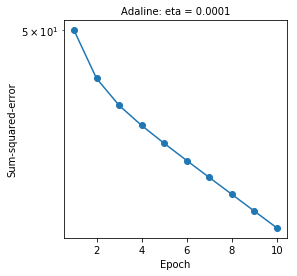

In [23]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Decrease learning rate once more.
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NFeatures_sepal_length_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show() #Negative slope == more iterations == smaller cost. However note that the change per iteration is very small. We would need thousands of iterations just to continue decreasing the cost. 

In [24]:
# Standardize Inputs 

#NOTE --- I havent read up on Standardization. But basically what we see is that we ca have both more iterations + a smaller learning rate, and view a negative slope trend (what we want)
#The number of iterations is only 5* more. (Not that big of a number but still big enough.)

NFeatures_sepal_length_and_petal_width_Std = np.copy(NFeatures_sepal_length_and_petal_width)
NFeatures_sepal_length_and_petal_width_Std[:,0] = (NFeatures_sepal_length_and_petal_width[:,0] - NFeatures_sepal_length_and_petal_width[:,0].mean()) / NFeatures_sepal_length_and_petal_width[:,0].std()
NFeatures_sepal_length_and_petal_width_Std[:,1] = (NFeatures_sepal_length_and_petal_width[:,1] - NFeatures_sepal_length_and_petal_width[:,1].mean()) / NFeatures_sepal_length_and_petal_width[:,1].std()

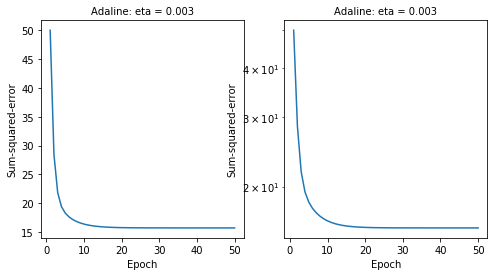

In [25]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NFeatures_sepal_length_and_petal_width_Std, NC) #Use the standardize Features_sepal_length_and_petal_width array. 
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

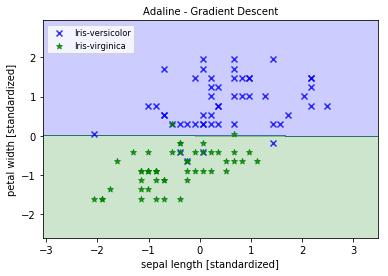

In [26]:
plot_decision_regions(NFeatures_sepal_length_and_petal_width_Std, NC, classifier = ada) #Notice, we are using the standardized data. 
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [27]:
accuracy_sepal_length_and_petal_width_Std = ada.accuracy(NFeatures_sepal_length_and_petal_width_Std, NC)

print(accuracy_sepal_length_and_petal_width_Std)

0.94


In [28]:
# focus on the features "sepal length" and "sepal width", feature indexes 0 and 1
fdx_sepal_length_and_sepal_width = np.array([0,1])



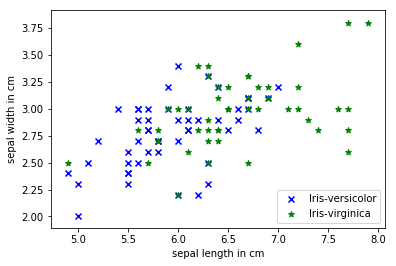

In [29]:
#Array(Column -- 2) filled with zeros for the two features. 
NFeatures_sepal_length_and_sepal_width = np.zeros((numCl, 2))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the two features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_length_and_sepal_width[j,0] = IA[i,fdx_sepal_length_and_sepal_width[0]] 
        NFeatures_sepal_length_and_sepal_width[j,1] = IA[i,fdx_sepal_length_and_sepal_width[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_length_and_sepal_width[j,0] = IA[i,fdx_sepal_length_and_sepal_width[0]]
        NFeatures_sepal_length_and_sepal_width[j,1] = IA[i,fdx_sepal_length_and_sepal_width[1]]
        j += 1
    i += 1

plt.close('all') #Clear all plots. 

#Create a single scatter plot of the data --- Not looking at Adaline Model Yet. 

#First add in the versicolor data values. 
plt.scatter(x = NFeatures_sepal_length_and_sepal_width[NC == 1, 0], y = NFeatures_sepal_length_and_sepal_width[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])

#Second add in the virginica data values. 
plt.scatter(x = NFeatures_sepal_length_and_sepal_width[NC == -1, 0], y = NFeatures_sepal_length_and_sepal_width[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx_sepal_length_and_sepal_width[0]])
plt.ylabel(IrisF[fdx_sepal_length_and_sepal_width[1]])
plt.legend(loc='lower right')
plt.show() #Now we have a clean plot between Iris-versicolor and Iris-virginica, showing only the sepal length vs sepal width

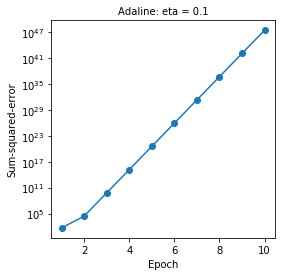

In [30]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

#Create an Adeline Model. Go through the features + classifications. And return the model.
#Set the n or eta or learning value to 0.1 
#Set epoch or number of times to go through training data as 10. -- Should come out with 10 different values.
ada = AdalineGD(n_iter=10, eta=0.1).fit(NFeatures_sepal_length_and_sepal_width, NC)
#This model will go through the features and try to compose it as one of the classifications.
#It will give us back the cost of each iteration (ie how off it was from y-output)
#And it will give us the weight coefficients for each sample/feature. 


# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

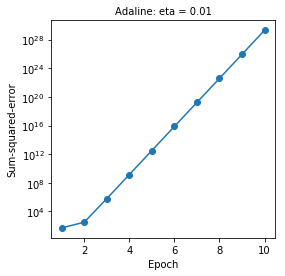

In [31]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Same as above, but this time lets see if the cost decreases ith a 10 time smaller learning rate. 
ada = AdalineGD(n_iter=10, eta=0.01).fit(NFeatures_sepal_length_and_sepal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show() #we do indeed see a decrease by ~ Half.  ----> Note that the more iterations there are, the greater the cost

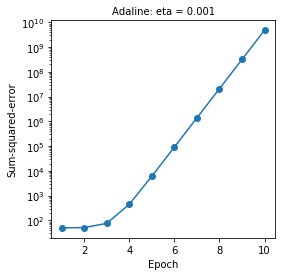

In [32]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Repeat again above but with an even smaller learning rate.
ada = AdalineGD(n_iter=10, eta=0.001).fit(NFeatures_sepal_length_and_sepal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show() #Again, tremendous decrease in cost. (Roughly same number of iterations) ----> Note that the more iterations there are, the greater the cost

#Notice between NFeatures_sepal_length_and_sepal_width and NFeatures_sepal_length_and_petal_width. This cost is higher by a factor of 10.
#However, this is still lower than sepal_length_and_petal_length by a factor of 1000



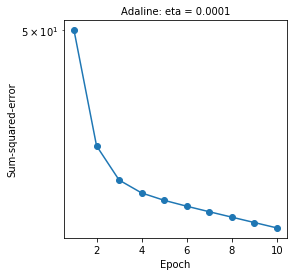

In [33]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Decrease learning rate once more.
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NFeatures_sepal_length_and_sepal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show() #Negative slope == more iterations == smaller cost. However note that the change per iteration is very small. We would need thousands of iterations just to continue decreasing the cost. 

In [34]:
# Standardize Inputs 

#NOTE --- I havent read up on Standardization. But basically what we see is that we ca have both more iterations + a smaller learning rate, and view a negative slope trend (what we want)
#The number of iterations is only 5* more. (Not that big of a number but still big enough.)

NFeatures_sepal_length_and_sepal_width_Std = np.copy(NFeatures_sepal_length_and_sepal_width)
NFeatures_sepal_length_and_sepal_width_Std[:,0] = (NFeatures_sepal_length_and_sepal_width[:,0] - NFeatures_sepal_length_and_sepal_width[:,0].mean()) / NFeatures_sepal_length_and_sepal_width[:,0].std()
NFeatures_sepal_length_and_sepal_width_Std[:,1] = (NFeatures_sepal_length_and_sepal_width[:,1] - NFeatures_sepal_length_and_sepal_width[:,1].mean()) / NFeatures_sepal_length_and_sepal_width[:,1].std()

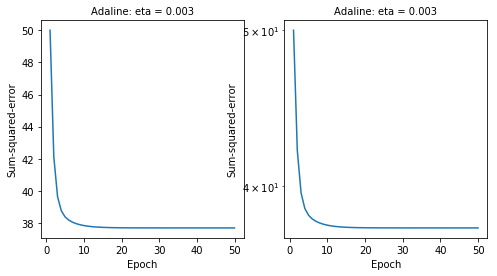

In [35]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NFeatures_sepal_length_and_sepal_width_Std, NC) #Use the standardize Features_sepal_length_and_sepal_width array. 
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

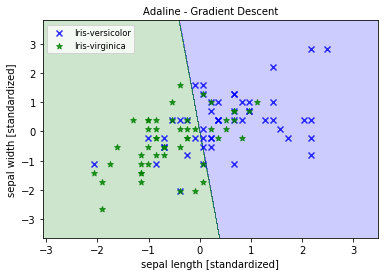

In [36]:
plot_decision_regions(NFeatures_sepal_length_and_sepal_width_Std, NC, classifier = ada) #Notice, we are using the standardized data. 
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [37]:
accuracy_sepal_length_and_sepal_width_Std = ada.accuracy(NFeatures_sepal_length_and_sepal_width_Std, NC)

print(accuracy_sepal_length_and_sepal_width_Std)

0.75


In [38]:
# foccus on the features "petal length" and "petal width", feature indexes 2 and 3
fdx_petal_length_and_petal_width = np.array([2,3])


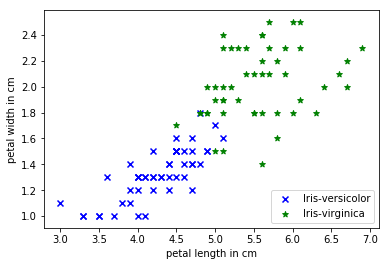

In [39]:
#Array(Column -- 2) filled with zeros for the two features. 
NFeatures_petal_length_and_petal_width = np.zeros((numCl, 2))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the two features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_petal_length_and_petal_width[j,0] = IA[i,fdx_petal_length_and_petal_width[0]] 
        NFeatures_petal_length_and_petal_width[j,1] = IA[i,fdx_petal_length_and_petal_width[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_petal_length_and_petal_width[j,0] = IA[i,fdx_petal_length_and_petal_width[0]]
        NFeatures_petal_length_and_petal_width[j,1] = IA[i,fdx_petal_length_and_petal_width[1]]
        j += 1
    i += 1

plt.close('all') #Clear all plots. 

#Create a single scatter plot of the data --- Not looking at Adaline Model Yet. 

#First add in the versicolor data values. 
plt.scatter(x = NFeatures_petal_length_and_petal_width[NC == 1, 0], y = NFeatures_petal_length_and_petal_width[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])

#Second add in the virginica data values. 
plt.scatter(x = NFeatures_petal_length_and_petal_width[NC == -1, 0], y = NFeatures_petal_length_and_petal_width[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx_petal_length_and_petal_width[0]])
plt.ylabel(IrisF[fdx_petal_length_and_petal_width[1]])
plt.legend(loc='lower right')
plt.show() #Now we have a clean plot between Iris-versicolor and Iris-virginica, showing only the petal length vs petal width

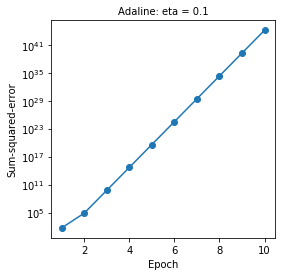

In [40]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

#Create an Adeline Model. Go through the features + classifications. And return the model.
#Set the n or eta or learning value to 0.1 
#Set epoch or number of times to go through training data as 10. -- Should come out with 10 different values.
ada = AdalineGD(n_iter=10, eta=0.1).fit(NFeatures_petal_length_and_petal_width, NC)
#This model will go through the features and try to compose it as one of the classifications.
#It will give us back the cost of each iteration (ie how off it was from y-output)
#And it will give us the weight coefficients for each sample/feature. 


# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

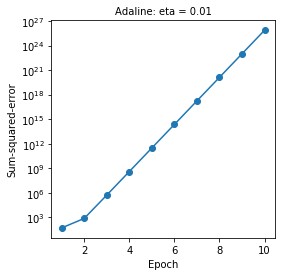

In [41]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Same as above, but this time lets see if the cost decreases ith a 10 time smaller learning rate. 
ada = AdalineGD(n_iter=10, eta=0.01).fit(NFeatures_petal_length_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show() #we do indeed see a decrease by ~ Half.  ----> Note that the more iterations there are, the greater the cost

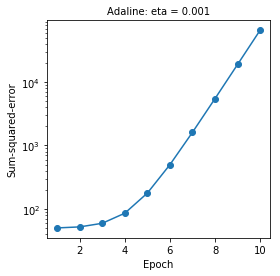

In [42]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Repeat again above but with an even smaller learning rate.
ada = AdalineGD(n_iter=10, eta=0.001).fit(NFeatures_petal_length_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show() #Again, tremendous decrease in cost. (Roughly same number of iterations) ----> Note that the more iterations there are, the greater the cost

#Notice between NFeatures_petal_length_and_petal_width and NFeatures_sepal_length_and_sepal_width lower than sepal_length_and_sepal_width by a factor of 10^6!




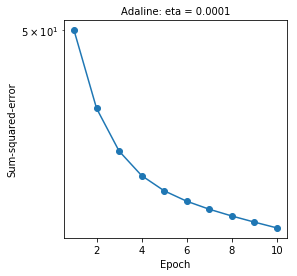

In [43]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Decrease learning rate once more.
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NFeatures_petal_length_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show() #Negative slope == more iterations == smaller cost. However note that the change per iteration is very small. We would need thousands of iterations just to continue decreasing the cost. 

In [44]:
# Standardize Inputs 

#NOTE --- I havent read up on Standardization. But basically what we see is that we ca have both more iterations + a smaller learning rate, and view a negative slope trend (what we want)
#The number of iterations is only 5* more. (Not that big of a number but still big enough.)

NFeatures_petal_length_and_petal_width_Std = np.copy(NFeatures_petal_length_and_petal_width)
NFeatures_petal_length_and_petal_width_Std[:,0] = (NFeatures_petal_length_and_petal_width[:,0] - NFeatures_petal_length_and_petal_width[:,0].mean()) / NFeatures_petal_length_and_petal_width[:,0].std()
NFeatures_petal_length_and_petal_width_Std[:,1] = (NFeatures_petal_length_and_petal_width[:,1] - NFeatures_petal_length_and_petal_width[:,1].mean()) / NFeatures_petal_length_and_petal_width[:,1].std()

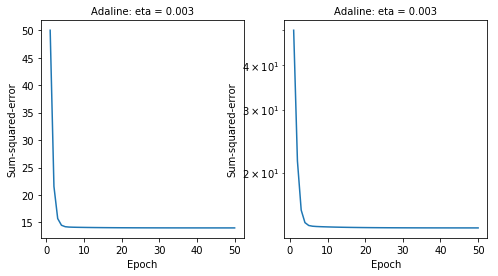

In [45]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NFeatures_petal_length_and_petal_width_Std, NC) #Use the standardize Features_petal_length_and_petal_width array. 
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

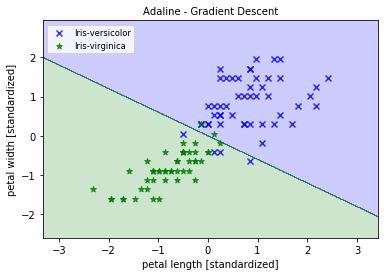

In [46]:
plot_decision_regions(NFeatures_petal_length_and_petal_width_Std, NC, classifier = ada) #Notice, we are using the standardized data. 
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [47]:
accuracy_petal_length_and_petal_width_Std = ada.accuracy(NFeatures_petal_length_and_petal_width_Std, NC)


print(accuracy_petal_length_and_petal_width_Std)

0.94


In [48]:
# foccus on the features "sepal width" and "petal length", feature indexes 1 and 2
fdx_sepal_width_and_petal_length = np.array([1,2])



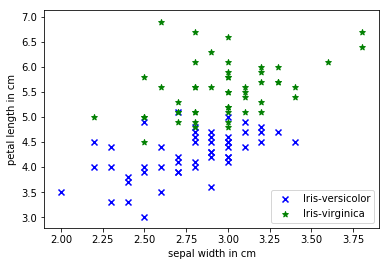

In [49]:
#Array(Column -- 2) filled with zeros for the two features. 
NFeatures_sepal_width_and_petal_length = np.zeros((numCl, 2))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the two features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_width_and_petal_length[j,0] = IA[i,fdx_sepal_width_and_petal_length[0]] 
        NFeatures_sepal_width_and_petal_length[j,1] = IA[i,fdx_sepal_width_and_petal_length[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_width_and_petal_length[j,0] = IA[i,fdx_sepal_width_and_petal_length[0]]
        NFeatures_sepal_width_and_petal_length[j,1] = IA[i,fdx_sepal_width_and_petal_length[1]]
        j += 1
    i += 1

plt.close('all') #Clear all plots. 

#Create a single scatter plot of the data --- Not looking at Adaline Model Yet. 

#First add in the versicolor data values. 
plt.scatter(x = NFeatures_sepal_width_and_petal_length[NC == 1, 0], y = NFeatures_sepal_width_and_petal_length[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])

#Second add in the virginica data values. 
plt.scatter(x = NFeatures_sepal_width_and_petal_length[NC == -1, 0], y = NFeatures_sepal_width_and_petal_length[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx_sepal_width_and_petal_length[0]])
plt.ylabel(IrisF[fdx_sepal_width_and_petal_length[1]])
plt.legend(loc='lower right')
plt.show() #Now we have a clean plot between Iris-versicolor and Iris-virginica, showing only the sepal width vs petal length

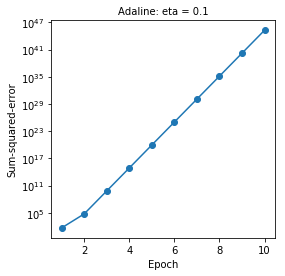

In [50]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

#Create an Adeline Model. Go through the features + classifications. And return the model.
#Set the n or eta or learning value to 0.1 
#Set epoch or number of times to go through training data as 10. -- Should come out with 10 different values.
ada = AdalineGD(n_iter=10, eta=0.1).fit(NFeatures_sepal_width_and_petal_length, NC)
#This model will go through the features and try to compose it as one of the classifications.
#It will give us back the cost of each iteration (ie how off it was from y-output)
#And it will give us the weight coefficients for each sample/feature. 


# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

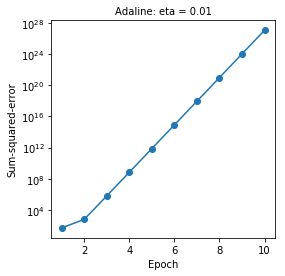

In [51]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Same as above, but this time lets see if the cost decreases ith a 10 time smaller learning rate. 
ada = AdalineGD(n_iter=10, eta=0.01).fit(NFeatures_sepal_width_and_petal_length, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show() #we do indeed see a decrease by ~ Half.  ----> Note that the more iterations there are, the greater the cost

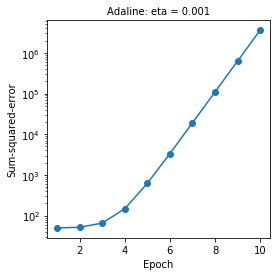

In [52]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Repeat again above but with an even smaller learning rate.
ada = AdalineGD(n_iter=10, eta=0.001).fit(NFeatures_sepal_width_and_petal_length, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show() #Again, tremendous decrease in cost. (Roughly same number of iterations) ----> Note that the more iterations there are, the greater the cost

#Notice between NFeatures_petal_length_and_petal_width and NFeatures_sepal_width_and_petal_length by a factor of 100!





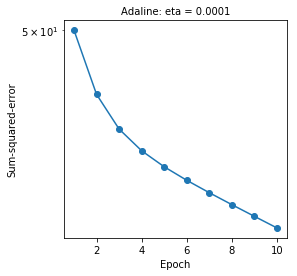

In [53]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Decrease learning rate once more.
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NFeatures_sepal_width_and_petal_length, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show() #Negative slope == more iterations == smaller cost. However note that the change per iteration is very small. We would need thousands of iterations just to continue decreasing the cost. 

In [54]:
# Standardize Inputs 

#NOTE --- I havent read up on Standardization. But basically what we see is that we ca have both more iterations + a smaller learning rate, and view a negative slope trend (what we want)
#The number of iterations is only 5* more. (Not that big of a number but still big enough.)

NFeatures_sepal_width_and_petal_length_Std = np.copy(NFeatures_petal_length_and_petal_width)
NFeatures_sepal_width_and_petal_length_Std[:,0] = (NFeatures_sepal_width_and_petal_length[:,0] - NFeatures_sepal_width_and_petal_length[:,0].mean()) / NFeatures_sepal_width_and_petal_length[:,0].std()
NFeatures_sepal_width_and_petal_length_Std[:,1] = (NFeatures_sepal_width_and_petal_length[:,1] - NFeatures_sepal_width_and_petal_length[:,1].mean()) / NFeatures_sepal_width_and_petal_length[:,1].std()

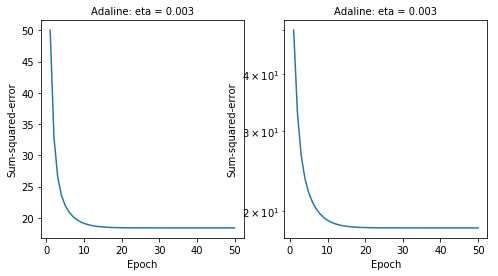

In [55]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NFeatures_sepal_width_and_petal_length_Std, NC) #Use the standardize Features_sepal_width_and_petal_length_Std array. 
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

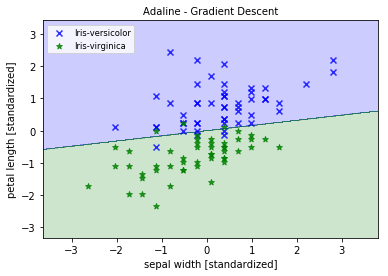

In [56]:
plot_decision_regions(NFeatures_sepal_width_and_petal_length_Std, NC, classifier = ada) #Notice, we are using the standardized data. 
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [57]:
accuracy_sepal_width_and_petal_length_Std = ada.accuracy(NFeatures_sepal_width_and_petal_length_Std, NC)


print(accuracy_sepal_width_and_petal_length_Std)

0.9299999999999999


In [58]:
# foccus on the features "sepal width" and "petal width", feature indexes 1 and 3
fdx_sepal_width_and_petal_width = np.array([1,3])

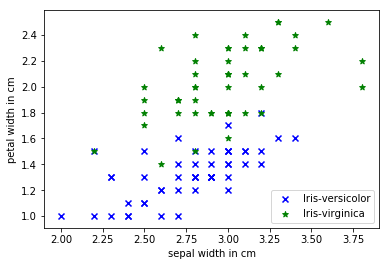

In [59]:
#Array(Column -- 2) filled with zeros for the two features. 
NFeatures_sepal_width_and_petal_width = np.zeros((numCl, 2))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the two features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_width_and_petal_width[j,0] = IA[i,fdx_sepal_width_and_petal_width[0]] 
        NFeatures_sepal_width_and_petal_width[j,1] = IA[i,fdx_sepal_width_and_petal_width[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_width_and_petal_width[j,0] = IA[i,fdx_sepal_width_and_petal_width[0]]
        NFeatures_sepal_width_and_petal_width[j,1] = IA[i,fdx_sepal_width_and_petal_width[1]]
        j += 1
    i += 1


plt.close('all') #Clear all plots. 

#Create a single scatter plot of the data --- Not looking at Adaline Model Yet. 

#First add in the versicolor data values. 
plt.scatter(x = NFeatures_sepal_width_and_petal_width[NC == 1, 0], y = NFeatures_sepal_width_and_petal_width[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])

#Second add in the virginica data values. 
plt.scatter(x = NFeatures_sepal_width_and_petal_width[NC == -1, 0], y = NFeatures_sepal_width_and_petal_width[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx_sepal_width_and_petal_width[0]])
plt.ylabel(IrisF[fdx_sepal_width_and_petal_width[1]])
plt.legend(loc='lower right')
plt.show() #Now we have a clean plot between Iris-versicolor and Iris-virginica, showing only the sepal width vs petal width

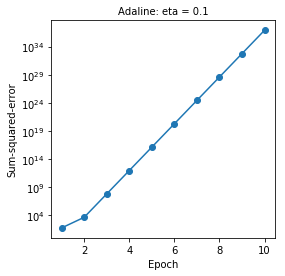

In [60]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

#Create an Adeline Model. Go through the features + classifications. And return the model.
#Set the n or eta or learning value to 0.1 
#Set epoch or number of times to go through training data as 10. -- Should come out with 10 different values.
ada = AdalineGD(n_iter=10, eta=0.1).fit(NFeatures_sepal_width_and_petal_width, NC)
#This model will go through the features and try to compose it as one of the classifications.
#It will give us back the cost of each iteration (ie how off it was from y-output)
#And it will give us the weight coefficients for each sample/feature. 


# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

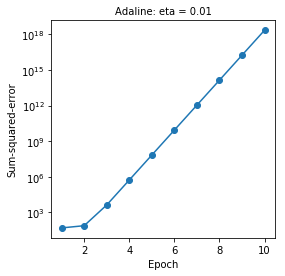

In [61]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Same as above, but this time lets see if the cost decreases ith a 10 time smaller learning rate. 
ada = AdalineGD(n_iter=10, eta=0.01).fit(NFeatures_sepal_width_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show() #we do indeed see a decrease by ~ Half.  ----> Note that the more iterations there are, the greater the cost

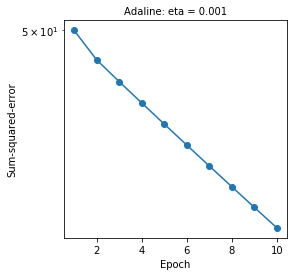

In [62]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Repeat again above but with an even smaller learning rate.
ada = AdalineGD(n_iter=10, eta=0.001).fit(NFeatures_sepal_width_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show() #Again, tremendous decrease in cost. (Roughly same number of iterations) ----> Note that the more iterations there are, the greater the cost

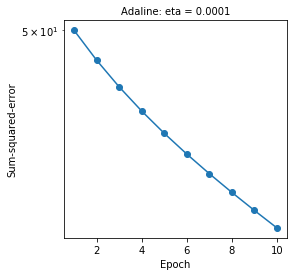

In [63]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))

#Decrease learning rate once more.
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NFeatures_sepal_width_and_petal_width, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show() 

#Notice how this is very similar to above! Number of iterations doesn't get us 

In [64]:
# Standardize Inputs 

#NOTE --- I havent read up on Standardization. But basically what we see is that we ca have both more iterations + a smaller learning rate, and view a negative slope trend (what we want)
#The number of iterations is only 5* more. (Not that big of a number but still big enough.)

NFeatures_sepal_width_and_petal_width_Std = np.copy(NFeatures_sepal_width_and_petal_width)
NFeatures_sepal_width_and_petal_width_Std[:,0] = (NFeatures_sepal_width_and_petal_width[:,0] - NFeatures_sepal_width_and_petal_width[:,0].mean()) / NFeatures_sepal_width_and_petal_width[:,0].std()
NFeatures_sepal_width_and_petal_width_Std[:,1] = (NFeatures_sepal_width_and_petal_width[:,1] - NFeatures_sepal_width_and_petal_width[:,1].mean()) / NFeatures_sepal_width_and_petal_width[:,1].std()

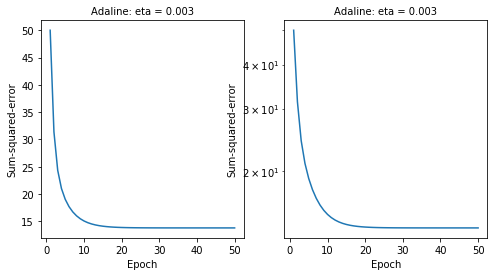

In [65]:
#print(NFeatures_sepal_width_and_petal_width_Std)


plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NFeatures_sepal_width_and_petal_width_Std, NC) #Use the standardize Features_sepal_width_and_petal_width_Std array. 
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

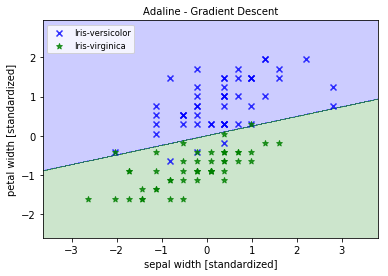

In [66]:
plot_decision_regions(NFeatures_sepal_width_and_petal_width_Std, NC, classifier = ada) #Notice, we are using the standardized data. 
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [67]:
accuracy_sepal_width_and_petal_width_Std = ada.accuracy(NFeatures_sepal_width_and_petal_width_Std, NC)
print(accuracy_sepal_width_and_petal_width_Std)

0.95


In [68]:
# foccus on the features "sepal length" and "sepal width" and "petal length", feature indexes 0, 1 and 2
fdx_sepal_length_and_sepal_width_and_petal_length = np.array([0,1,2])
print(fdx_sepal_length_and_sepal_width_and_petal_length)

[0 1 2]


In [69]:
#Array(Column -- 3) filled with zeros for the three features. 
NFeatures_sepal_length_and_sepal_width_and_petal_length = np.zeros((numCl, 3))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the three features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_length_and_sepal_width_and_petal_length[j,0] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length[0]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length[j,1] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length[1]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length[j,2] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_length_and_sepal_width_and_petal_length[j,0] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length[0]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length[j,1] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length[1]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length[j,2] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length[2]]
        j += 1
    i += 1


In [70]:
# Standardize Inputs 
NFeatures_sepal_length_and_sepal_width_and_petal_length_Std = np.copy(NFeatures_sepal_length_and_sepal_width_and_petal_length)
NFeatures_sepal_length_and_sepal_width_and_petal_length_Std[:,0] = (NFeatures_sepal_length_and_sepal_width_and_petal_length[:,0] - NFeatures_sepal_length_and_sepal_width_and_petal_length[:,0].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length[:,0].std()
NFeatures_sepal_length_and_sepal_width_and_petal_length_Std[:,1] = (NFeatures_sepal_length_and_sepal_width_and_petal_length[:,1] - NFeatures_sepal_length_and_sepal_width_and_petal_length[:,1].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length[:,1].std()
NFeatures_sepal_length_and_sepal_width_and_petal_length_Std[:,2] = (NFeatures_sepal_length_and_sepal_width_and_petal_length[:,2] - NFeatures_sepal_length_and_sepal_width_and_petal_length[:,2].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length[:,2].std()

In [71]:
ada = AdalineGD(n_iter=50, eta=0.003).fit(NFeatures_sepal_length_and_sepal_width_and_petal_length_Std, NC)

#Fit the data for 3 features -- learn first. ---> 


In [72]:
accuracy_sepal_length_and_sepal_width_and_petal_length_Std = ada.accuracy(NFeatures_sepal_length_and_sepal_width_and_petal_length_Std, NC)

print(accuracy_sepal_length_and_sepal_width_and_petal_length_Std)

0.9299999999999999


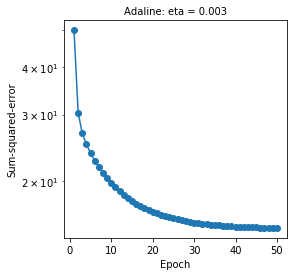

In [73]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.003', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

In [74]:
# foccus on the features "sepal length" and "sepal width" and "petal width", feature indexes 0, 1 and 3
fdx_sepal_length_and_sepal_width_and_petal_width = np.array([0,1,3])
print(fdx_sepal_length_and_sepal_width_and_petal_width)

[0 1 3]


In [75]:
#Array(Column -- 3) filled with zeros for the three features. 
NFeatures_sepal_length_and_sepal_width_and_petal_width = np.zeros((numCl, 3))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the three features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_length_and_sepal_width_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_width[0]]
        NFeatures_sepal_length_and_sepal_width_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_width[1]]
        NFeatures_sepal_length_and_sepal_width_and_petal_width[j,2] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_width[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_length_and_sepal_width_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_width[0]]
        NFeatures_sepal_length_and_sepal_width_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_width[1]]
        NFeatures_sepal_length_and_sepal_width_and_petal_width[j,2] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_width[2]]
        j += 1
    i += 1



In [76]:
# Standardize Inputs 
NFeatures_sepal_length_and_sepal_width_and_petal_width_Std = np.copy(NFeatures_sepal_length_and_sepal_width_and_petal_length)
NFeatures_sepal_length_and_sepal_width_and_petal_width_Std[:,0] = (NFeatures_sepal_length_and_sepal_width_and_petal_width[:,0] - NFeatures_sepal_length_and_sepal_width_and_petal_width[:,0].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_width[:,0].std()
NFeatures_sepal_length_and_sepal_width_and_petal_width_Std[:,1] = (NFeatures_sepal_length_and_sepal_width_and_petal_width[:,1] - NFeatures_sepal_length_and_sepal_width_and_petal_width[:,1].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_width[:,1].std()
NFeatures_sepal_length_and_sepal_width_and_petal_width_Std[:,2] = (NFeatures_sepal_length_and_sepal_width_and_petal_width[:,2] - NFeatures_sepal_length_and_sepal_width_and_petal_width[:,2].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_width[:,2].std()

In [77]:
ada = AdalineGD(n_iter=50, eta=0.003).fit(NFeatures_sepal_length_and_sepal_width_and_petal_width_Std, NC)

#Fit the data for 3 features -- learn first. ---> 



In [78]:
accuracy_sepal_length_and_sepal_width_and_petal_width_Std = ada.accuracy(NFeatures_sepal_length_and_sepal_width_and_petal_width_Std, NC)


print(accuracy_sepal_length_and_sepal_width_and_petal_width_Std)

0.95


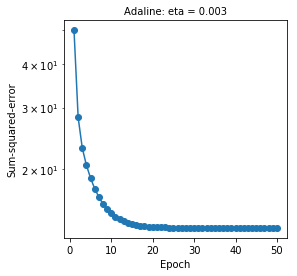

In [79]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.003', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

In [80]:
# foccus on the features "sepal length" and "petal length" and "petal width", feature indexes 0, 2 and 3
fdx_sepal_length_and_petal_length_and_petal_width = np.array([0,2,3])
print(fdx_sepal_length_and_petal_length_and_petal_width)

[0 2 3]


In [81]:
#Array(Column -- 3) filled with zeros for the three features. 
NFeatures_sepal_length_and_petal_length_and_petal_width = np.zeros((numCl, 3))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the three features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_length_and_petal_length_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_petal_length_and_petal_width[0]]
        NFeatures_sepal_length_and_petal_length_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_petal_length_and_petal_width[1]]
        NFeatures_sepal_length_and_petal_length_and_petal_width[j,2] = IA[i,fdx_sepal_length_and_petal_length_and_petal_width[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_length_and_petal_length_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_petal_length_and_petal_width[0]]
        NFeatures_sepal_length_and_petal_length_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_petal_length_and_petal_width[1]]
        NFeatures_sepal_length_and_petal_length_and_petal_width[j,2] = IA[i,fdx_sepal_length_and_petal_length_and_petal_width[2]]
        j += 1
    i += 1




In [82]:
# Standardize Inputs 
NFeatures_sepal_length_and_petal_length_and_petal_width_Std = np.copy(NFeatures_sepal_length_and_petal_length_and_petal_width)
NFeatures_sepal_length_and_petal_length_and_petal_width_Std[:,0] = (NFeatures_sepal_length_and_petal_length_and_petal_width[:,0] - NFeatures_sepal_length_and_petal_length_and_petal_width[:,0].mean()) / NFeatures_sepal_length_and_petal_length_and_petal_width[:,0].std()
NFeatures_sepal_length_and_petal_length_and_petal_width_Std[:,1] = (NFeatures_sepal_length_and_petal_length_and_petal_width[:,1] - NFeatures_sepal_length_and_petal_length_and_petal_width[:,1].mean()) / NFeatures_sepal_length_and_petal_length_and_petal_width[:,1].std()
NFeatures_sepal_length_and_petal_length_and_petal_width_Std[:,2] = (NFeatures_sepal_length_and_petal_length_and_petal_width[:,2] - NFeatures_sepal_length_and_petal_length_and_petal_width[:,2].mean()) / NFeatures_sepal_length_and_petal_length_and_petal_width[:,2].std()

In [83]:
ada = AdalineGD(n_iter=50, eta=0.003).fit(NFeatures_sepal_length_and_petal_length_and_petal_width_Std, NC)

#Fit the data for 3 features -- learn first. ---> 




In [84]:
accuracy_sepal_length_and_petal_length_and_petal_width_Std = ada.accuracy(NFeatures_sepal_length_and_petal_length_and_petal_width_Std, NC)

print(accuracy_sepal_length_and_petal_length_and_petal_width_Std)

0.96


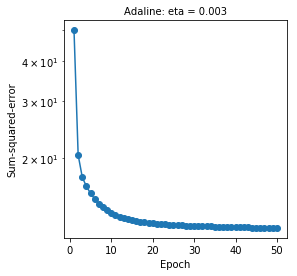

In [85]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.003', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

In [86]:
# foccus on the features "sepal width" and "petal length" and "petal width", feature indexes 1, 2 and 3
fdx_sepal_width_and_petal_length_and_petal_width = np.array([1,2,3])
print(fdx_sepal_width_and_petal_length_and_petal_width)

[1 2 3]


In [87]:
#Array(Column -- 3) filled with zeros for the three features. 
NFeatures_sepal_width_and_petal_length_and_petal_width = np.zeros((numCl, 3))

# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the three features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_width_and_petal_length_and_petal_width[j,0] = IA[i,fdx_sepal_width_and_petal_length_and_petal_width[0]]
        NFeatures_sepal_width_and_petal_length_and_petal_width[j,1] = IA[i,fdx_sepal_width_and_petal_length_and_petal_width[1]]
        NFeatures_sepal_width_and_petal_length_and_petal_width[j,2] = IA[i,fdx_sepal_width_and_petal_length_and_petal_width[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_width_and_petal_length_and_petal_width[j,0] = IA[i,fdx_sepal_width_and_petal_length_and_petal_width[0]]
        NFeatures_sepal_width_and_petal_length_and_petal_width[j,1] = IA[i,fdx_sepal_width_and_petal_length_and_petal_width[1]]
        NFeatures_sepal_width_and_petal_length_and_petal_width[j,2] = IA[i,fdx_sepal_width_and_petal_length_and_petal_width[2]]
        j += 1
    i += 1





In [88]:
# Standardize Inputs 
NFeatures_sepal_width_and_petal_length_and_petal_width_Std = np.copy(NFeatures_sepal_width_and_petal_length_and_petal_width)
NFeatures_sepal_width_and_petal_length_and_petal_width_Std[:,0] = (NFeatures_sepal_width_and_petal_length_and_petal_width[:,0] - NFeatures_sepal_width_and_petal_length_and_petal_width[:,0].mean()) / NFeatures_sepal_width_and_petal_length_and_petal_width[:,0].std()
NFeatures_sepal_width_and_petal_length_and_petal_width_Std[:,1] = (NFeatures_sepal_width_and_petal_length_and_petal_width[:,1] - NFeatures_sepal_width_and_petal_length_and_petal_width[:,1].mean()) / NFeatures_sepal_width_and_petal_length_and_petal_width[:,1].std()
NFeatures_sepal_width_and_petal_length_and_petal_width_Std[:,2] = (NFeatures_sepal_width_and_petal_length_and_petal_width[:,2] - NFeatures_sepal_width_and_petal_length_and_petal_width[:,2].mean()) / NFeatures_sepal_width_and_petal_length_and_petal_width[:,2].std()

In [89]:
ada = AdalineGD(n_iter=50, eta=0.003).fit(NFeatures_sepal_width_and_petal_length_and_petal_width_Std, NC)

#Fit the data for 3 features -- learn first. --->


In [90]:
accuracy_sepal_width_and_petal_length_and_petal_width_Std = ada.accuracy(NFeatures_sepal_width_and_petal_length_and_petal_width_Std, NC);

print(accuracy_sepal_width_and_petal_length_and_petal_width_Std)

0.96


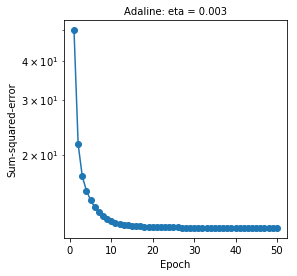

In [91]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.003', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

In [92]:
# foccus on the ALL features "sepal length" and sepal width" and "petal length" and "petal width", feature indexes 0, 1, 2 and 3
fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width = np.array([0, 1,2,3])
print(fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width)

[0 1 2 3]


In [93]:
#Array(Column -- 3) filled with zeros for the three features. 
NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width = np.zeros((numCl, 4)) ##Now have 4 columns


# Create arrays pull in only versicolor + virginica Setting versicolor value to 1 and virginica value to -1.
# With it pull the three features that we want. Store classifications in NC and features in NF. 
# NOTE, the indexes will be the same. 
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]: #If Iris Type maches versicolor, as going down the list. 
        #Pull in associated feature values.
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[0]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[1]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,2] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[2]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,3] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[3]]
        #Add last column in
        j += 1
    if Cl[i] == IC[cdx[1]]: #If Iris Type maches virginica, as going down the list.   
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,0] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[0]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,1] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[1]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,2] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[2]]
        NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[j,3] = IA[i,fdx_sepal_length_and_sepal_width_and_petal_length_and_petal_width[3]]
        #Add last column in
        j += 1
    i += 1

In [94]:
# Standardize Inputs 
NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std = np.copy(NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width)
NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std[:,0] = (NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,0] - NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,0].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,0].std()
NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std[:,1] = (NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,1] - NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,1].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,1].std()
NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std[:,2] = (NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,2] - NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,2].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,2].std()
#Include final column
NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std[:,3] = (NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,3] - NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,3].mean()) / NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width[:,3].std()

In [95]:
ada = AdalineGD(n_iter=50, eta=0.003).fit(NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std, NC)

#Fit the data for 3 features -- learn first. --->



In [96]:
accuracy_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std = ada.accuracy(NFeatures_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std, NC);

print(accuracy_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std)

0.97


In [97]:
####NOTE MUST RUN EVERYTHING IN ORDER BECASUE ALL REFER TO THE SAME ADALINE MODEL. THUS, WHEN WE CALL FIT ON ANY SET, IT WILL UPDATE THE WEIGHTS ARRAY. THIS WAS A BAD COPY AND PASTE EXAMPLE ON MY END.
####I SHOULD HAVE RENAMED ALL VARIABLES (AND PROBABLY PUT THIS ALL IN A FORLOOP)

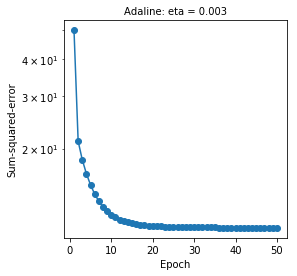

In [98]:
plt.close('all') #Close all plots 

#Set up a figure, and a single subplot. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4)) 

# semilogy plots data with logarithmic scale for the y-axis. 
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o') #Here we are plotting the cost as Y. number of iterations as x. 
ax.set_xlabel('Epoch') #number of iterations
ax.set_ylabel('Sum-squared-error') #Cost. 
ax.set_title('Adaline: eta = 0.003', fontsize ='medium')
plt.show() #High cost per increased number of iterations ----> Note that the more iterations there are, the greater the cost

In [99]:
print('{0:30}{1:30}{2:30}'.format("Features Used","Accuracy","Coverged/Diverged"))
print('-'*110)

 
#Test to see how it prints. String are too long. 
#results = [
 #          ["Sepal Length Vs Sepal Width", 0, "T"],
 #          ["Sepal Length vs Petal Lengh", 0 , "T"],
 #          ["Sepal Length vs Petal Width", 0 , "T"],
 #          ["Sepal Width vs Petal Length", 0 , "T"],
 #          ["Sepal Width vs Petal Width", 0 , "T"],
 #          ["Petal Lengh vs Petal Width", 0 , "T"],
 #          ["Sepal Length vs Sepal Width vs Petal Length", 0, "T"],
 #          ["Sepal Length vs Sepal Width vs Petal Width", 0 , "T"],
 #          ["Sepal Width vs Petal Length vs Petal Width", 0 , "T"],
 #          ["Sepal Length vs Petal Length vs Petal Width", 0 , "T"],
#           ["Sepal Length vs Sepal Width vs Petal Length vs Petal Width", 0 , "T"]]


results = [
           ["0 1", accuracy_sepal_length_and_sepal_width_Std, True],
           ["0 2", accuracy_sepal_length_and_petal_length_Std , True],
           ["0 3", accuracy_sepal_length_and_petal_width_Std , True],
           ["1 2", accuracy_sepal_width_and_petal_length_Std , True],
           ["1 3", accuracy_sepal_width_and_petal_width_Std , True],
           ["2 3", accuracy_petal_length_and_petal_width_Std , True],
           ["0 1 2", accuracy_sepal_length_and_sepal_width_and_petal_length_Std, True],
           ["0 1 3", accuracy_sepal_length_and_sepal_width_and_petal_width_Std, True],
           ["1 2 3", accuracy_sepal_width_and_petal_length_and_petal_width_Std, True],
           ["0 2 3", accuracy_sepal_length_and_petal_length_and_petal_width_Std, True],
           ["0 1 2 3", accuracy_sepal_length_and_sepal_width_and_petal_length_and_petal_width_Std , True]
]



for features, accuracy,convergence in results:
    print('{0:7}{1:30.2f}{2:30}'.format(features,accuracy,convergence))
    



Features Used                 Accuracy                      Coverged/Diverged             
--------------------------------------------------------------------------------------------------------------
0 1                              0.75                             1
0 2                              0.94                             1
0 3                              0.94                             1
1 2                              0.93                             1
1 3                              0.95                             1
2 3                              0.94                             1
0 1 2                            0.93                             1
0 1 3                            0.95                             1
1 2 3                            0.96                             1
0 2 3                            0.96                             1
0 1 2 3                          0.97                             1


In [100]:
print("The case of features that provided the greatest accuracy,\nwas the one that included all four features for training the model.\nThis case produced an accuracy of 0.97.")
print("The case of features that provided the least accuracy,\nwas the case of the two features 'Sepal Length' vs 'Sepal Width'")
print("\n\n\n\nDoes using more dimensions help when trying to classify the data in this dataset?\n\n\n\n\nFor this assignment, I was looking to see if the number of features(Sepal/Petal Length/Width) between Iris-Versicolor and Iris-Virginica\nis indeed impacts the accuracy of the Adaline Model.\nI used the same number of iterations and\nlearning rate for each feature trial, the learning rate (eta) being 0.003\nand the number of iterations being 50.\n\nTo set a basis:\nWe already identified that a higher learning rate causes the cost function to exponentially increase,\nthis is because\nwe continue to overshoot our prediction of the weights\n(ie when we are performing the particle derivatives) and therefore\ncontinue to increase up the graph/function.\nWith a lower learning rate, however, we would need a larger number of\niterations to view the convergence of the cost function.\nThis is because we take smaller steps when updating the weights, \ngetting and closer to the minimum value.\n\n\n\nAs such, we consistently stay with eta: 0.003 and n_iter: 50.\nAdditionally, because all costs  decrease and converge for each trial in this assignment,\nwe can proceed with reviewing the accuracy of each feature combination experimentation.\n\n\n\nOne would assume that as we increase the number of features to compare \nand learn from in the Adaline model, that the accuracy would improve(increase).\nAlthough we see a major improvement between features sepal length and sepal width versus all four features, 0.75 to 0.97,\nthis hypothesis however cannot be viewed as a theorem.\nFor all other feature combinations, the range falls within 0.93 to 0.96.\nAll of these combinations are fairly close to all four features (0.97)\nthan the combination of sepal width versus sepal length (0.75).\nIt is to be noted that the more features that are included, can not often help,\nor make the process more complex/unexplainable for classification.\nThus the goal is to find the most accuracy with the least number of features.\n\n\n\nIncreasing the number of features does help confirm that our classifications are correct\n(as 0.97 was the highest accuracy), however with just 2 features such as sepal width and petal width,\nwe still have a fairly close 0.95 accuracy.")


The case of features that provided the greatest accuracy,
was the one that included all four features for training the model.
This case produced an accuracy of 0.97.
The case of features that provided the least accuracy,
was the case of the two features 'Sepal Length' vs 'Sepal Width'




Does using more dimensions help when trying to classify the data in this dataset?




For this assignment, I was looking to see if the number of features(Sepal/Petal Length/Width) between Iris-Versicolor and Iris-Virginica
is indeed impacts the accuracy of the Adaline Model.
I used the same number of iterations and
learning rate for each feature trial, the learning rate (eta) being 0.003
and the number of iterations being 50.

To set a basis:
We already identified that a higher learning rate causes the cost function to exponentially increase,
this is because
we continue to overshoot our prediction of the weights
(ie when we are performing the particle derivatives) and therefore
continue to increase up